In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from notebook_utils import load_pickle
import datetime
import pandas as pd

In [3]:
job_name = "e1"

# Load episode data, hyper parameters and runtime from saved pickle objects
episodes = load_pickle(job_name, 'episodes.p')
hyperparameters = load_pickle(job_name, 'hyperparameters.p')
runtime = load_pickle(job_name, 'runtime.p')

# Load episodes into Pandas df and convert to numpy array to facilitate plotting
# [{'max_tile': 32, 'merge_score': 376, 'number': 0, 'reward': 1, 'epsilon': 1.0, 'number_moves': 67}, ...]
# array([[ 32., 376.,   0.,   1.,   1.,  67.], ...])
episode_matrix = pd.DataFrame(episodes).values 

print(f"{job_name} ran for {datetime.timedelta(seconds=runtime)},  {len(episodes)} episodes\n")

'''Print Hyperparameters'''
print("Hyper parameters")
for key in hyperparameters:
    print(key, "=", hyperparameters[key])

e1 ran for 5:26:05.960000,  7001 episodes

Hyper parameters
batch_size = 5000
discount_factor = 0.95
model = Sequential(
  (0): Conv2d(1, 64, kernel_size=(2, 2), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=256, out_features=64, bias=True)
  (6): Linear(in_features=64, out_features=4, bias=True)
)
replay_buffer = 15000
learning_rate = 0.0001
loss_fn = MSELoss()
optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)
no_episodes = 25000
no_episodes_to_reach_epsilon = 1000
no_episodes_before_training = 2000
no_episodes_before_updating_target = 100
min_epsilon = 0.01
use_double_dqn = True


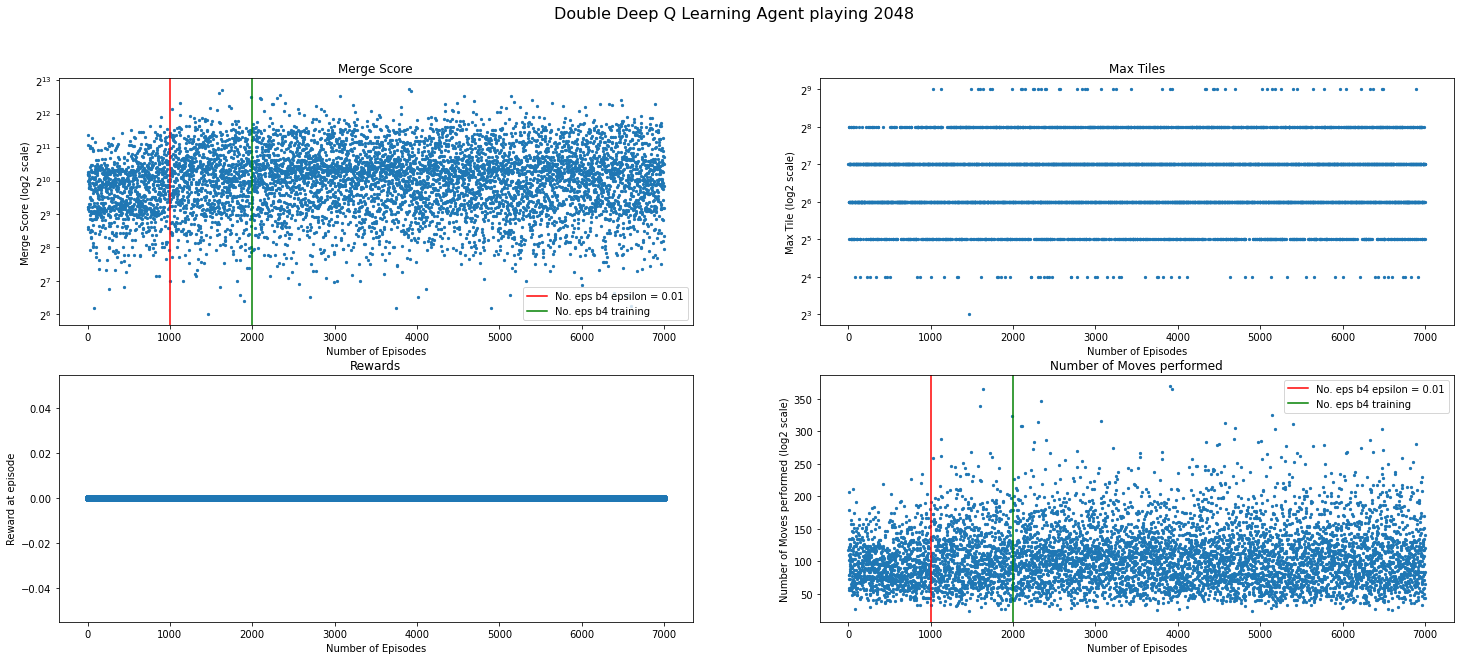

In [5]:
# [{'max_tile': 32, 'merge_score': 376, 'number': 0, 'reward': 1, 'epsilon': 1.0, 'number_moves': 67}, ...]
# array([[ 32., 376.,   0.,   1.,   1.,  67.], ...])
s = 5

max_tiles = episode_matrix.T[0]
merge_scores = episode_matrix.T[1]
iteration = episode_matrix.T[2]
rewards = episode_matrix.T[3]
epsilon = episode_matrix.T[4]
number_of_moves = episode_matrix.T[5]

fig = plt.figure(figsize=(25,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_yscale('log', base=2)
ax2.set_yscale('log', base=2)

title = "Deep Q Learning Agent playing 2048"
if hyperparameters['use_double_dqn']:
    title = "Double " + title
fig.suptitle(title, fontsize=16)


ax1.scatter(iteration, merge_scores, s=s)
ax1.set_title("Merge Score")
ax1.set_ylabel("Merge Score (log2 scale)")
ax1.set_xlabel("Number of Episodes")
ax1.axvline(x=hyperparameters["no_episodes_to_reach_epsilon"], c='r', label=f"No. eps b4 epsilon = {hyperparameters['min_epsilon']}")
ax1.axvline(x=hyperparameters["no_episodes_before_training"], c='g', label="No. eps b4 training")
ax1.legend()

ax2.scatter(iteration, max_tiles, s=s)
ax2.set_title("Max Tiles")
ax2.set_ylabel("Max Tile (log2 scale)")
ax2.set_xlabel("Number of Episodes")

ax3.scatter(iteration, rewards)
ax3.set_title("Rewards")
ax3.set_ylabel("Reward at episode")
ax3.set_xlabel("Number of Episodes")

ax4.scatter(iteration, number_of_moves, s=s)
ax4.set_title("Number of Moves performed")
ax4.set_ylabel("Number of Moves performed (log2 scale)")
ax4.axvline(x=hyperparameters["no_episodes_to_reach_epsilon"], c='r', label=f"No. eps b4 epsilon = {hyperparameters['min_epsilon']}")
ax4.axvline(x=hyperparameters["no_episodes_before_training"], c='g', label="No. eps b4 training")
ax4.legend()
ax4.set_xlabel("Number of Episodes")

plt.show()

In [7]:
np.histogram(max_tiles)

(array([ 825, 2490, 2663,    0,  968,    0,    0,    0,    0,   55],
       dtype=int64),
 array([  8. ,  58.4, 108.8, 159.2, 209.6, 260. , 310.4, 360.8, 411.2,
        461.6, 512. ]))

array([[   8,   16,   32,   64,  128,  256,  512],
       [   1,   64,  760, 2490, 2663,  968,   55]])

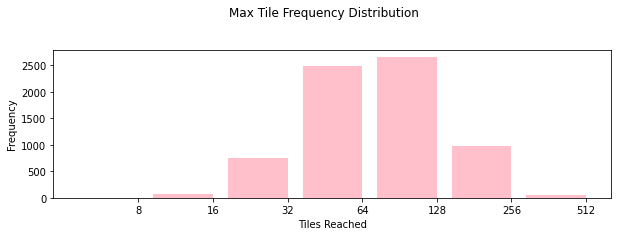

In [10]:
# every = 1000
# no_batches = int(len(max_tiles)/1000)

# ax = fig.add_subplot(212)
# for i in range(no_batches):
#     batch = max_tiles[i: i+every]
#     freq = get_max_tile_frequency(batch)
#     plot_max_tile_distribution(freq, ax, include_labels=False)
#     # now later you get a new subplot; change the geometry of the existing
#     n = len(fig.axes)
#     for i in range(n):
#         fig.axes[i].change_geometry(n+1, 1, i+1)
    
#     # add the new
#     ax = fig.add_subplot(n+1, 1, n+1)
    
# plt.subplots_adjust(hspace=0.5)

def get_max_tile_frequency(max_tiles_array):
    max_tile_frequency = np.array(np.unique(max_tiles_array, return_counts=True), dtype=int)
    return max_tile_frequency

def plot_max_tile_distribution(max_tile_frequency, ax, include_labels=True):
    barwidth= 0.8
    ax.bar(np.arange(len(max_tile_frequency[0])) , max_tile_frequency[1], barwidth, color="pink")
    ax.set_xticks(np.arange(len(max_tile_frequency[1]))+barwidth/2.)
    ax.set_xticklabels(max_tile_frequency[0])
    if include_labels:
        ax.set_xlabel("Tiles Reached")
        ax.set_ylabel("Frequency")

fig = plt.figure(figsize=(10,6))
fig.suptitle("Max Tile Frequency Distribution")
base_ax = fig.add_subplot(211)

max_tile_frequency = get_max_tile_frequency(max_tiles)
plot_max_tile_distribution(max_tile_frequency, base_ax)
max_tile_frequency